# Emotion Analysis

## 📌 Step 1: Load and Explore the Dataset | Visualize Emotion Distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422746 entries, 0 to 422745
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sentence  422746 non-null  object
 1   emotion   422746 non-null  object
dtypes: object(2)
memory usage: 6.5+ MB
None
                                            sentence emotion
0      i just feel really helpless and heavy hearted    fear
1  ive enjoyed being able to slouch about relax a...     sad
2  i gave up my internship with the dmrg and am f...    fear
3                         i dont know i feel so lost     sad
4  i am a kindergarten teacher and i am thoroughl...    fear


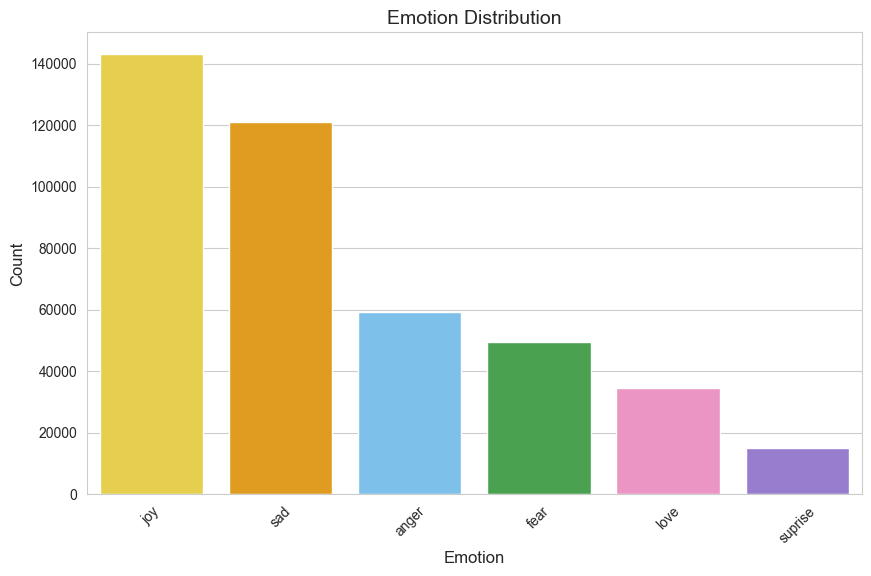

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("combined_emotion.csv")  # Ensure the file is in the working directory

# Display dataset information
print(df.info())
print(df.head())


# Count occurrences of each emotion
emotion_counts = df["emotion"].value_counts()

# Define a color palette
custom_palette = {
    "joy": "#ffe135",
    "sad": "#FFA500",
    "anger": "#6ac5fe",
    "fear": "#3bb143",
    "love": "#f987c5",
    "suprise": "#9370DB"
}

# Create a DataFrame for the emotion counts
emotion_counts_df = emotion_counts.reset_index()
emotion_counts_df.columns = ["emotion", "count"]

# Plot the bar chart with colors
plt.figure(figsize=(10, 6))
sns.barplot(
    data=emotion_counts_df,
    x="emotion",
    y="count",
    hue="emotion",  # Use 'hue' to assign colors to each emotion
    dodge=False,    # Prevents separate bars for the same hue
    palette=custom_palette
)
plt.title("Emotion Distribution", fontsize=14)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()

 ## 📌 Step 2: Preprocessing (Cleaning Text Data)

In [2]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = text.split()  # Tokenize words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)  # Return cleaned text

# Apply preprocessing to dataset
df["cleaned_sentence"] = df["sentence"].apply(preprocess_text)

# Display processed data
print(df.head())

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


                                            sentence emotion  \
0      i just feel really helpless and heavy hearted    fear   
1  ive enjoyed being able to slouch about relax a...     sad   
2  i gave up my internship with the dmrg and am f...    fear   
3                         i dont know i feel so lost     sad   
4  i am a kindergarten teacher and i am thoroughl...    fear   

                                    cleaned_sentence  
0                 feel really helpless heavy hearted  
1  ive enjoyed able slouch relax unwind frankly n...  
2            gave internship dmrg feeling distraught  
3                                dont know feel lost  
4  kindergarten teacher thoroughly weary job take...  


## 📌 Step 3: Generate Word Clouds for Emotions

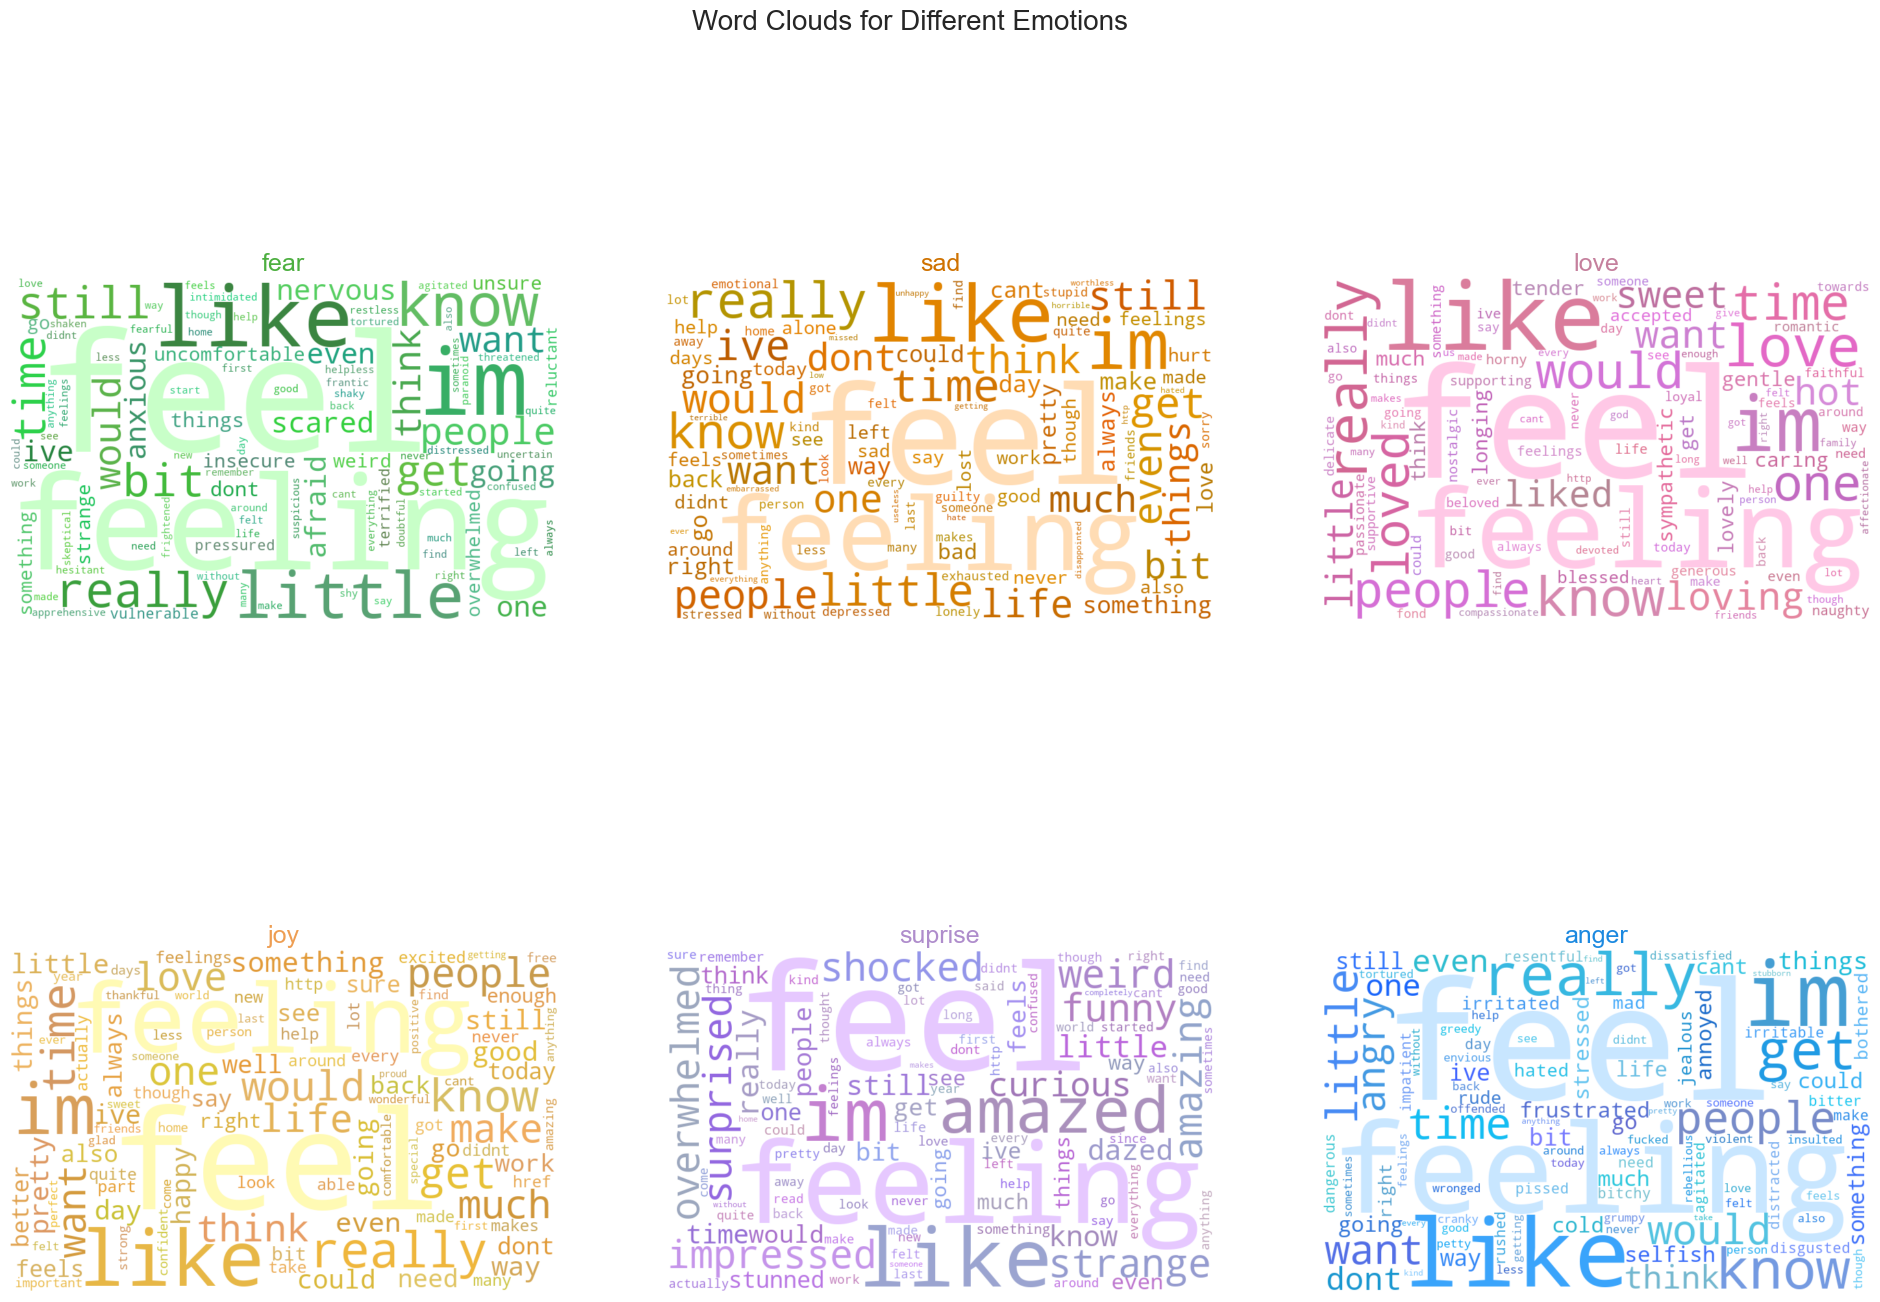

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import random

# Function to convert RGB to HEX format
def rgb_to_hex(r, g, b):
    return "#{:02x}{:02x}{:02x}".format(r, g, b)

# Adjust color functions: "feel" & "feeling" are the brightest; other words have a balanced spectrum.
def color_func_joy(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in ["feel", "feeling"]:
        return rgb_to_hex(255, 250, 180)  # Bright Yellow
    return rgb_to_hex(random.randint(200, 240), random.randint(150, 200), random.randint(50, 100))  # Moderate Yellow

def color_func_sad(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in ["feel", "feeling"]:
        return rgb_to_hex(255, 220, 180)  # Bright Orange
    return rgb_to_hex(random.randint(180, 230), random.randint(90, 150), 0)  # Moderate Orange

def color_func_anger(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in ["feel", "feeling"]:
        return rgb_to_hex(200, 230, 255)  # Light Blue
    return rgb_to_hex(random.randint(20, 120), random.randint(100, 200), random.randint(200, 255))  # Balanced Blue

def color_func_fear(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in ["feel", "feeling"]:
        return rgb_to_hex(200, 255, 200)  # Light Green
    return rgb_to_hex(random.randint(30, 100), random.randint(130, 210), random.randint(60, 140))  # Moderate Green

def color_func_love(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in ["feel", "feeling"]:
        return rgb_to_hex(255, 200, 230)  # Light Pink
    return rgb_to_hex(random.randint(180, 230), random.randint(100, 140), random.randint(140, 220))  # Moderate Pink

def color_func_surprise(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in ["feel", "feeling"]:
        return rgb_to_hex(230, 200, 255)  # Light Purple
    return rgb_to_hex(random.randint(140, 200), random.randint(100, 170), random.randint(180, 240))  # Moderate Purple

# Map each emotion to its respective color function
color_funcs = {
    "joy": color_func_joy,
    "sad": color_func_sad,
    "anger": color_func_anger,
    "fear": color_func_fear,
    "love": color_func_love,
    "suprise": color_func_surprise
}

# Create a dictionary to store word frequencies for each emotion
emotion_word_freq = {}

# Tokenize and count words for each emotion
for emotion in df["emotion"].unique():
    text = " ".join(df[df["emotion"] == emotion]["cleaned_sentence"])  # Merge sentences
    tokens = text.split()  # Tokenize words
    emotion_word_freq[emotion] = Counter(tokens)  # Count word frequency

# Create larger word clouds for each emotion
fig, axes = plt.subplots(2, 3, figsize=(24, 16))  # Increase figure size
fig.suptitle("Word Clouds for Different Emotions", fontsize=20)

for ax, (emotion, word_freq) in zip(axes.flatten(), emotion_word_freq.items()):
    wordcloud = WordCloud(
        width=800, height=500,  # Make each word cloud larger
        background_color="white",
        max_words=100,  # Limit words for clarity
        color_func=color_funcs.get(emotion, lambda *args, **kwargs: "#000000")  # Assign spectrum colors
    ).generate_from_frequencies(word_freq)

    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(emotion, fontsize=18, color=color_funcs[emotion]("word", 100, (0, 0), None))  # Title matches spectrum color
    ax.axis("off")

plt.show()

## 📌 Step 4: Feature Engineering with TF-IDF

In [4]:
# Convert text into numerical format using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important words
X_tfidf = tfidf_vectorizer.fit_transform(df["cleaned_sentence"])

# Encode Emotion Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["emotion"])

# Display processed data shape
print(X_tfidf.shape, y.shape)

# Create a table with labels and their corresponding encoded values
label_mapping = pd.DataFrame({
    "Emotion Label": label_encoder.classes_,
    "Encoded Value": label_encoder.transform(label_encoder.classes_)
})

# Display the table
print(label_mapping)

# Optionally, save the mapping to a CSV file
label_mapping.to_csv("label_encoding_mapping.csv", index=False)

(422746, 5000) (422746,)
  Emotion Label  Encoded Value
0         anger              0
1          fear              1
2           joy              2
3          love              3
4           sad              4
5       suprise              5


In [5]:
y

array([1, 4, 1, ..., 2, 1, 0])

## 📌 Step 5: Deep Learning - Convert Text to Word Embeddings (Word2Vec) | Feature Engineering

In [6]:
from gensim.models import Word2Vec

# Tokenize text into lists of words
df["tokenized"] = df["cleaned_sentence"].apply(lambda x: x.split())

# Train a Word2Vec model on our dataset (DEFAULT: CBOW)
word2vec_model = Word2Vec(sentences=df["tokenized"], vector_size=100, window=5, min_count=1, workers=4)

# Save the trained Word2Vec model
word2vec_model.save("word2vec_model.bin")

# Convert sentences into numerical feature vectors (Averaging Word Vectors)
def get_word2vec(sentence):
    vectors = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
    return sum(vectors)/len(vectors) if vectors else [0]*100  # Average of word vectors

df["word2vec"] = df["tokenized"].apply(get_word2vec)

## 📌 Step 6: Load the Saved Word2Vec Model (For Future Use)

In [8]:
from gensim.models import Word2Vec

# Load the saved Word2Vec model
word2vec_model = Word2Vec.load("word2vec_model.bin")

## 📌 Step 7: Verify Word Embeddings

In [9]:
# Get the vector for a specific word
word = "happy"
if word in word2vec_model.wv:
    print(f"Vector for '{word}':\n", word2vec_model.wv[word])
else:
    print(f"'{word}' is not in the vocabulary.")

Vector for 'happy':
 [-0.99633425 -0.60709304  0.7092802  -0.3540085  -0.39652267  1.3626907
  0.6277099   0.20434323 -1.2175353  -0.44212088 -1.1647635   0.7144293
  0.8118208  -0.33092928 -1.0951463  -1.0609167   0.86277276 -0.5353305
  0.6257947  -1.6622748  -0.3949067  -0.3332667  -0.6290355   0.16381288
 -0.25783676 -0.80469114  1.3164079  -0.09141181  0.8689024  -1.7335596
  2.106105    2.3016078   1.8696111   1.5886866   0.38703638  0.53679895
 -1.6561315   0.6343646  -0.28284112 -0.98328876 -0.61624134 -0.5796295
  1.408944   -1.2357608   0.46893173 -0.35056442  1.2329581  -0.57008874
  1.0153785  -1.3597118  -0.09618251 -0.15484332 -0.6117433   0.7558807
 -0.4016147  -1.1797341  -0.31736022 -0.4339934  -0.6495328   1.0801024
  0.42526403 -0.82091624 -0.50692606 -0.24297321  0.3767637   0.93211746
  1.1120713  -0.23353978 -0.8816455  -0.5146527   0.8750389   1.7429776
  1.5562447   1.1332748   1.0931591   0.19497754  1.2951223  -0.28622037
 -1.0533183   0.09057298 -1.1804079  -

## 📌 Step 8: Find Similar Words

In [10]:
# Find top 5 similar words to "love"
word_similarities = word2vec_model.wv.most_similar("love", topn=5)
print("Words most similar to 'love':", word_similarities)

Words most similar to 'love': [('loving', 0.6978189945220947), ('loved', 0.6095836162567139), ('adore', 0.6085114479064941), ('loves', 0.6006513833999634), ('apart', 0.5619880557060242)]


## 📌 Step 9: Convert Sentences into Numerical Feature Vectors

In [11]:
import numpy as np

# Function to convert a sentence into a numerical vector
def get_sentence_embedding(sentence):
    words = sentence.split()
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)  # 100-dimension vector

# Apply sentence embedding to the dataset
df["word2vec"] = df["cleaned_sentence"].apply(get_sentence_embedding)

# Check the shape of sentence embeddings
print("Shape of Word2Vec Sentence Embeddings:", df["word2vec"].iloc[0].shape)

Shape of Word2Vec Sentence Embeddings: (100,)


## 📌 Step 10: Train a Classifier Using Word2Vec Features

### 🟢 Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert list of vectors to a numerical matrix
X = np.vstack(df["word2vec"].values)  # Convert list of arrays to a matrix
y = df["emotion"]  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape, "Test Set Shape:", X_test.shape)

Training Set Shape: (338196, 100) Test Set Shape: (84550, 100)


### 🟢 Train a Machine Learning Model

#### 1️⃣ Random Forest (Baseline Model) with Word2vec

In [17]:
# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make Predictions
y_pred = clf.predict(X_test)

# Evaluate Model Performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.611732702542874
              precision    recall  f1-score   support

       anger       0.68      0.35      0.46     11863
        fear       0.60      0.31      0.41      9930
         joy       0.64      0.84      0.73     28614
        love       0.39      0.17      0.24      6911
         sad       0.60      0.78      0.68     24238
     suprise       0.17      0.05      0.08      2994

    accuracy                           0.61     84550
   macro avg       0.51      0.42      0.43     84550
weighted avg       0.59      0.61      0.58     84550



In [22]:
from sklearn.model_selection import train_test_split
import numpy as np

# Convert list of vectors to a numerical matrix
X = np.vstack(df["word2vec"].values)  # Convert list of arrays to a matrix
y = df["emotion"]  # Target labels

# First, split into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Now, split Train (80%) into Train (90%) and Validation (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (304376, 100)
Validation Set Shape: (33820, 100)
Test Set Shape: (84550, 100)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Validate on the Validation Set
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Test on the Test Set
y_test_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.6164695446481372
Test Accuracy: 0.6140035481963335
              precision    recall  f1-score   support

       anger       0.69      0.34      0.46     11863
        fear       0.62      0.31      0.42      9930
         joy       0.64      0.85      0.73     28614
        love       0.41      0.17      0.24      6911
         sad       0.60      0.79      0.68     24238
     suprise       0.19      0.06      0.09      2994

    accuracy                           0.61     84550
   macro avg       0.52      0.42      0.43     84550
weighted avg       0.60      0.61      0.58     84550



In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("New Class Distribution:", pd.Series(y_train_balanced).value_counts())


New Class Distribution: emotion
sad        114453
fear       114453
joy        114453
anger      114453
love       114453
suprise    114453
Name: count, dtype: int64


In [ ]:
from sklearn.svm import SVC

# Train SVM Model on imbalanced dataset
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Make Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate Performance
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

In [16]:
# Train Random Forest Classifier for balanced dataset(SMOTE)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [17]:
# Make Predictions
y_pred = clf.predict(X_test)

# Evaluate Model Performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.6221525724423418
              precision    recall  f1-score   support

       anger       0.56      0.56      0.56     11863
        fear       0.52      0.54      0.53      9930
         joy       0.73      0.73      0.73     28614
        love       0.39      0.46      0.42      6911
         sad       0.69      0.64      0.67     24238
     suprise       0.30      0.33      0.32      2994

    accuracy                           0.62     84550
   macro avg       0.53      0.54      0.54     84550
weighted avg       0.63      0.62      0.62     84550



In [21]:
from sklearn.linear_model import SGDClassifier

# Use SGDClassifier (Stochastic Gradient Descent)
svm_fast = SGDClassifier(loss="hinge", random_state=42)
svm_fast.fit(X_train_balanced, y_train_balanced)

SGDClassifier(random_state=42)

In [18]:
from sklearn.linear_model import SGDClassifier

# Use SGDClassifier (Stochastic Gradient Descent) Balanced dataset SMOTE
svm_fast = SGDClassifier(loss="hinge", random_state=42)
svm_fast.fit(X_train_balanced, y_train_balanced)

# Make Predictions
y_pred_svm_fast = svm_fast.predict(X_test)

# Evaluate Performance
print("SGD-SVM Accuracy:", accuracy_score(y_test, y_pred_svm_fast))
print(classification_report(y_test, y_pred_svm_fast))

SGD-SVM Accuracy: 0.609745712596097
              precision    recall  f1-score   support

       anger       0.55      0.64      0.59     11863
        fear       0.55      0.62      0.58      9930
         joy       0.82      0.64      0.72     28614
        love       0.38      0.69      0.49      6911
         sad       0.79      0.52      0.63     24238
     suprise       0.25      0.74      0.38      2994

    accuracy                           0.61     84550
   macro avg       0.56      0.64      0.56     84550
weighted avg       0.69      0.61      0.63     84550



In [14]:
from sklearn.linear_model import SGDClassifier

# Use SGDClassifier (Stochastic Gradient Descent) Imbalanced dataset
svm_fast = SGDClassifier(loss="hinge", random_state=42)
svm_fast.fit(X_train, y_train)

# Make Predictions
y_pred_svm_fast = svm_fast.predict(X_test)

# Evaluate Performance
print("SGD-SVM Accuracy:", accuracy_score(y_test, y_pred_svm_fast))
print(classification_report(y_test, y_pred_svm_fast))

SGD-SVM Accuracy: 0.6672501478415139
              precision    recall  f1-score   support

       anger       0.62      0.51      0.56     11863
        fear       0.64      0.54      0.58      9930
         joy       0.70      0.89      0.79     28614
        love       0.62      0.11      0.19      6911
         sad       0.66      0.76      0.71     24238
     suprise       0.28      0.11      0.15      2994

    accuracy                           0.67     84550
   macro avg       0.59      0.49      0.50     84550
weighted avg       0.65      0.67      0.64     84550



In [25]:
import joblib

# Save the trained model
joblib.dump(svm_fast, "final_svm_model.pkl")

# Save the Label Encoder (so we can decode predictions)
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["cleaned_sentence"])

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(df["cleaned_sentence"])
X_padded = pad_sequences(X_sequences, maxlen=100, padding="post", truncating="post")

# Encode emotion labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df["emotion"])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    SpatialDropout1D(0.2),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(32, activation="relu"),
    Dense(len(label_encoder.classes_), activation="softmax")
])

# Compile Model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)

/Users/tabitalucaciu/ICA Master/YEAR 1/SEM 1/AMDA (Advanced Methods in Data Analysis)/Reports/report2/.venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
5285/5285 ━━━━━━━━━━━━━━━━━━━━ 778s 146ms/step - accuracy: 0.3361 - loss: 1.5791 - val_accuracy: 0.3384 - val_loss: 1.5767
Epoch 2/5
5285/5285 ━━━━━━━━━━━━━━━━━━━━ 846s 160ms/step - accuracy: 0.3373 - loss: 1.5765 - val_accuracy: 0.3384 - val_loss: 1.5759
Epoch 3/5
5285/5285 ━━━━━━━━━━━━━━━━━━━━ 1095s 207ms/step - accuracy: 0.3377 - loss: 1.5759 - val_accuracy: 0.3384 - val_loss: 1.5753
Epoch 4/5
5285/5285 ━━━━━━━━━━━━━━━━━━━━ 1014s 192ms/step - accuracy: 0.3381 - loss: 1.5756 - val_accuracy: 0.3384 - val_loss: 1.5751
Epoch 5/5
5285/5285 ━━━━━━━━━━━━━━━━━━━━ 1014s 192ms/step - accuracy: 0.3396 - loss: 1.5753 - val_accuracy: 0.3384 - val_loss: 1.5751


In [16]:
X_padded = pad_sequences(X_sequences, maxlen=200, padding="post", truncating="post")

In [18]:
Embedding(input_dim=5000, output_dim=256)

<Embedding name=embedding_2, built=False>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, SpatialDropout1D

# Updated LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=256, input_length=200),
    SpatialDropout1D(0.3),
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    LSTM(128),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation="softmax")
])

# Compile the Model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/tabitalucaciu/ICA Master/YEAR 1/SEM 1/AMDA (Advanced Methods in Data Analysis)/Reports/report2/.venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)  # Reduce learning rate
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [21]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/15
2836/5285 ━━━━━━━━━━━━━━━━━━━━ 15:20 376ms/step - accuracy: 0.3040 - loss: 1.6465

KeyboardInterrupt: 